In [57]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.integrate import quad

import sys
sys.path.append('..')
from src.utils import input_unit
from src.imf import PowerLawIMF, Star, EmbeddedCluster, IGIMF, GSMF

In [2]:
imf = PowerLawIMF(1.e6, 0.08, 150)

In [3]:
imf.integrate(1.1, 100, normalized=False)

0.6776564922658656

In [4]:
imf.breaks

array([8.0e-02, 1.0e+00, 1.5e+02])

In [5]:
imf.exponents

array([-1.3, -1.3, -2.3, -2.3])

In [6]:
imf.norms

array([264782.17371156, 264782.17371156, 264782.17371156, 264782.17371156,
            0.        ])

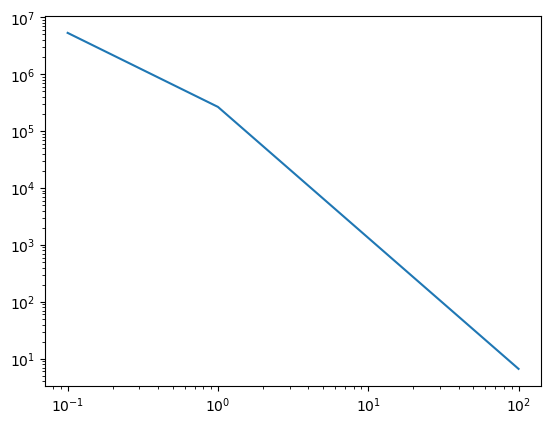

In [7]:
x0s = np.logspace(-1, 2, 100)
imfs = [imf.imf(x0) for x0 in x0s]

plt.plot(x0s, imfs)
plt.xscale('log')
plt.yscale('log')

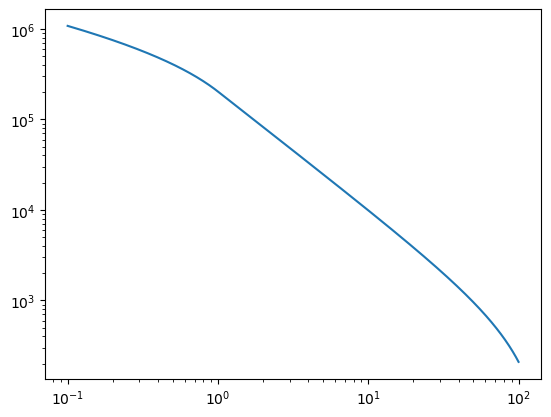

In [8]:
x0s = np.logspace(-1, 2, 1000)
imf_ints = [imf.integrate(x0, 150, normalized=True) for x0 in x0s]

plt.plot(x0s, imf_ints)

plt.xscale('log')
plt.yscale('log')

In [9]:
imf.m_tot/imf.integrate(0.08, 150, mass=True)

1.0

In [10]:
imf.integrate(0.08, 150, mass=False)

1203726.7256386587

In [11]:
star = Star()

In [12]:
star.get_mmax_k()

In [13]:
star.breaks

array([8.00000000e-02, 5.00000000e-01, 1.00000000e+00, 1.49998464e+02])

In [16]:
star.exponents

array([-1.3   , -1.3   , -2.3   , -0.5337, -0.5337])

In [17]:
star.norms

array([    0.        , 18875.52756434,  9437.76378217,  9437.76378217,
           0.        ])

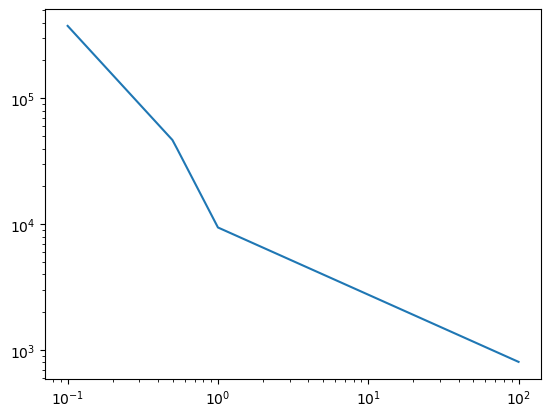

In [19]:
x0s = np.logspace(-1, 2, 100)
imfs = [star.imf(x0) for x0 in x0s]

plt.plot(x0s, imfs)
plt.xscale('log')
plt.yscale('log')

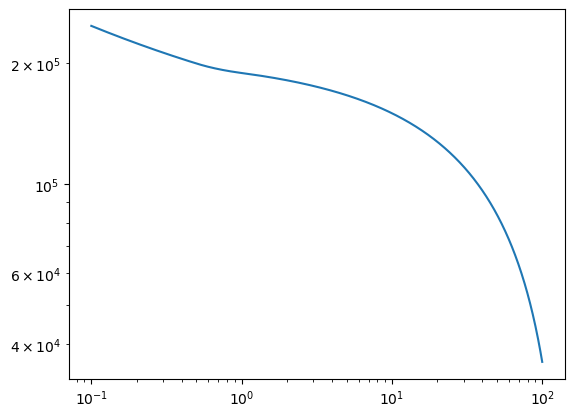

In [21]:
x0s = np.logspace(-1, 2, 1000)
imf_ints = [star.integrate(x0, 150, normalized=True) for x0 in x0s]

plt.plot(x0s, imf_ints)

plt.xscale('log')
plt.yscale('log')

In [22]:
star.m_tot/star.integrate(0.08, 150, mass=True)

0.9999999999999998

In [23]:
star.integrate(0.08, 150, mass=False)

256514.27395224012

In [24]:
ecl = EmbeddedCluster()

In [25]:
ecl.get_mmax_k()

In [26]:
ecl.breaks

array([5.00000000e+00, 3.28656837e+06])

In [27]:
ecl.exponents

array([-2., -2., -2.])

In [28]:
ecl.norms

array([     0.        , 746496.13624834,      0.        ])

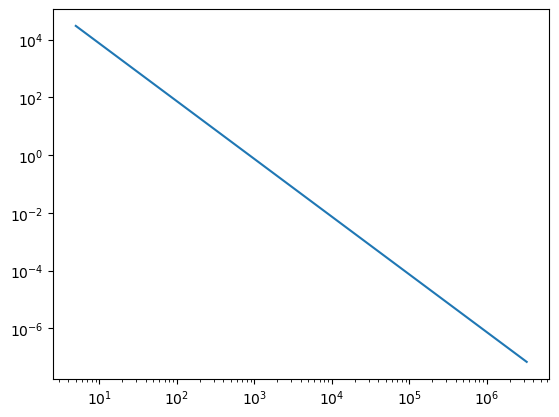

In [40]:
x0s = np.logspace(*np.log10([ecl.breaks[0], ecl.breaks[-1]]), 100)
imfs = [ecl.imf(x0) for x0 in x0s]

plt.plot(x0s, imfs)
plt.xscale('log')
plt.yscale('log')

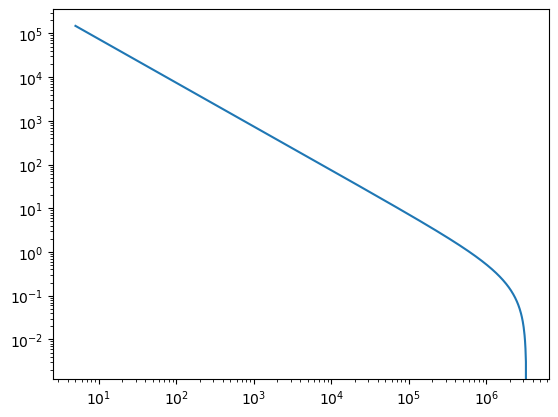

In [41]:
x0s = np.logspace(*np.log10([ecl.breaks[0], ecl.breaks[-1]]), 1000)
imf_ints = [ecl.integrate(x0, 1.e9, normalized=True) for x0 in x0s]

plt.plot(x0s, imf_ints)

plt.xscale('log')
plt.yscale('log')

In [44]:
ecl.m_tot/ecl.integrate(ecl.breaks[0], ecl.breaks[-1], mass=True)

1.0000000003938951

In [45]:
ecl.integrate(ecl.breaks[0], ecl.breaks[-1], mass=False)

149299.00011423303

In [46]:
igimf = IGIMF()

In [47]:
igimf.set_clusters()

In [48]:
igimf.imf(10)

10171.729387823329

In [51]:
igimf.m_trunc_min

0.08

In [54]:
igimf.imf(1)

796953.3372384054

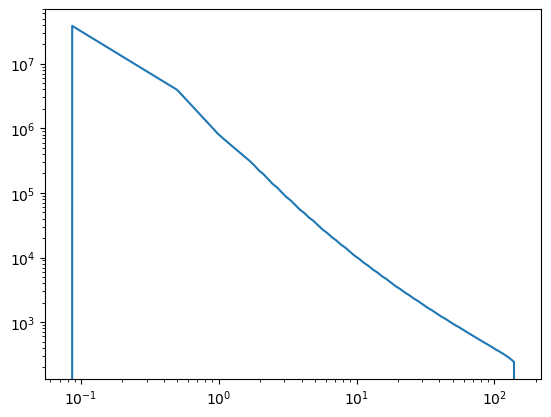

In [55]:
x0s = np.logspace(*np.log10([igimf.m_trunc_min, igimf.m_trunc_max]), 100)
imfs = [igimf.imf(x0) for x0 in x0s]

plt.plot(x0s, imfs)
plt.xscale('log')
plt.yscale('log')

In [58]:
m_int, m_unc = quad(lambda m: m*igimf.imf(m), igimf.m_trunc_min, igimf.m_trunc_max)

C:\Users\lucas\AppData\Local\Temp\ipykernel_49596\3492850233.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(lambda m: m*igimf.imf(m), igimf.m_trunc_min, igimf.m_trunc_max)


(9987968.194435354, 13384.487776897848)

In [62]:
np.array([m_int, m_unc])/igimf.m_tot

array([0.99879682, 0.00133845])

In [63]:
int, unc = quad(igimf.imf, igimf.m_trunc_min, igimf.m_trunc_max)
int, unc

C:\Users\lucas\AppData\Local\Temp\ipykernel_49596\809966605.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int, unc = quad(igimf.imf, igimf.m_trunc_min, igimf.m_trunc_max)


(6610785.480223216, 36548.49099434074)